

**THIS IS NOT THE COMPLETE TUTORIAL - see file with (MAIN) in the name. Paste all this code before the first Python block**

First you'll need to select which hardware setup you have. You'll need to select both a `SCOPETYPE` and a `PLATFORM`. `SCOPETYPE` can either be `'OPENADC'` for the CWLite/CW1200 or `'CWNANO'` for the CWNano. `PLATFORM` is the target device, with `'CWLITEARM'`/`'CW308_STM32F3'` being the best supported option, followed by `'CWLITEXMEGA'`/`'CW308_XMEGA'`, then by `'CWNANO'`. As of CW 5.4, you can select the SimpleSerial version
used. For example:

```python
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_1_1'
```

This code will connect the scope and do some basic setup. We're now just going to use a special setup script to do this. This script contains the commands we ran seperately before.

In [2]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_1_1'

In [3]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


The following code will build the firmware for the target.

In [4]:
%%bash -s "$PLATFORM" "$SS_VER"
cd ../../../hardware/victims/firmware/masked_dilithium
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$2

SS_VER set to SS_VER_1_1
make clean_objs .dep 
make[1]: Entering directory '/home/sou/Documents/chipwhisperer-develop/hardware/victims/firmware/masked_dilithium'
SS_VER set to SS_VER_1_1
rm -f -- basic-passwdcheck-CWLITEARM.hex
rm -f -- basic-passwdcheck-CWLITEARM.eep
rm -f -- basic-passwdcheck-CWLITEARM.cof
rm -f -- basic-passwdcheck-CWLITEARM.elf
rm -f -- basic-passwdcheck-CWLITEARM.map
rm -f -- basic-passwdcheck-CWLITEARM.sym
rm -f -- basic-passwdcheck-CWLITEARM.lss
rm -f -- objdir-CWLITEARM/*.o
rm -f -- objdir-CWLITEARM/*.lst
rm -f -- basic-passwdcheck.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel.s stm32f3_sysmem.s
rm -f -- basic-passwdcheck.d simpleserial.d stm32f3_hal.d stm32f3_hal_lowlevel.d stm32f3_sysmem.d
rm -f -- basic-passwdcheck.i simpleserial.i stm32f3_hal.i stm32f3_hal_lowlevel.i stm32f3_sysmem.i
make[1]: '.dep' is up to date.
make[1]: Leaving directory '/home/sou/Documents/chipwhisperer-develop/hardware/victims/firmware/masked_dilithium'
make begin gccversion bui

Finally, all that's left is to program the device, which can be done with the following line:

In [5]:
cw.program_target(scope, prog, "../../../hardware/victims/firmware/masked_dilithium/basic-passwdcheck-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 4947 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 4947 bytes


To make interacting with the hardware easier, let's define a function to attempt a password and return a power trace:

In [6]:
def cap_pass_trace(pass_guess):
    reset_target(scope)
    num_char = target.in_waiting()
    while num_char > 0:
        target.read(num_char, 10)
        time.sleep(0.01)
        num_char = target.in_waiting()

    scope.arm()
    target.write(pass_guess)
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')

    trace = scope.get_last_trace()
    return trace

We also don't need all of the default 5000 samples in the trace. 3000 is a good starting point for most targets:

In [7]:
scope.adc.samples = 3000

[-0.00292969 -0.00292969 -0.00292969 ... -0.00292969 -0.00292969
 -0.00292969]


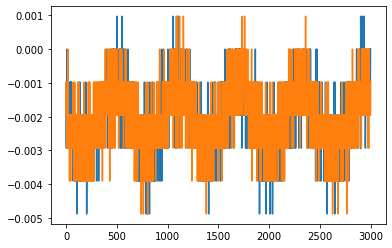

In [8]:
#Example - capture 'h' - end with newline '\n' as serial protocol expects that
trace_h = cap_pass_trace("h\n")

print(trace_h)

# ###################
# START SOLUTION
# ###################
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(cap_pass_trace("h\n"))
plt.plot(cap_pass_trace("0\n"))
plt.show()
# ###################
# END SOLUTION
# ###################

In [10]:
# ###################
# START SOLUTION
# ###################
from tqdm.notebook import tqdm
plt.figure()
for c in tqdm('abcdefghijklmnopqrstuvwxyz0123456789'):
    trace = cap_pass_trace(c + "\n")
    plt.plot(trace[0:500])

# ###################
# END SOLUTION
# ###################

AttributeError: 'FloatProgress' object has no attribute 'style'

<Figure size 432x288 with 0 Axes>